In [1]:
import pandas as pd

df=pd.read_excel('article_content_train.xlsx')

In [2]:
df=df['내용']

In [3]:
import re

def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

df['content_cleaned'] = df.apply(preprocessing)
content = df['content_cleaned'].tolist()

In [4]:
from konlpy.tag import Okt

okt = Okt()
X_train=[]
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
for sentence in content:
    temp_X=[]
    temp_X=okt.morphs(sentence,stem=True)
    temp_X=[word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

# 군집화 할 그룹의 갯수 정의
n_clusters = 100

# CountVectrizer로 토큰화
for word in X_train:
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(word)

# l2 정규화
X = normalize(X)

# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters).fit(X)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# labels에 merge
df['labels'] = labels

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
)
tfidf.fit(df.content_cleaned)
text = tfidf.transform(df.content_cleaned)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


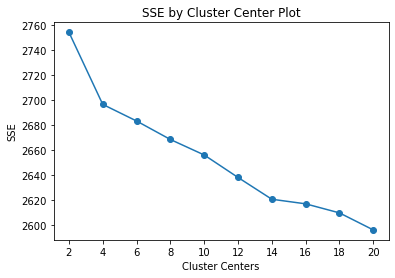

In [8]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [9]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2838, random_state=20).fit_predict(text)

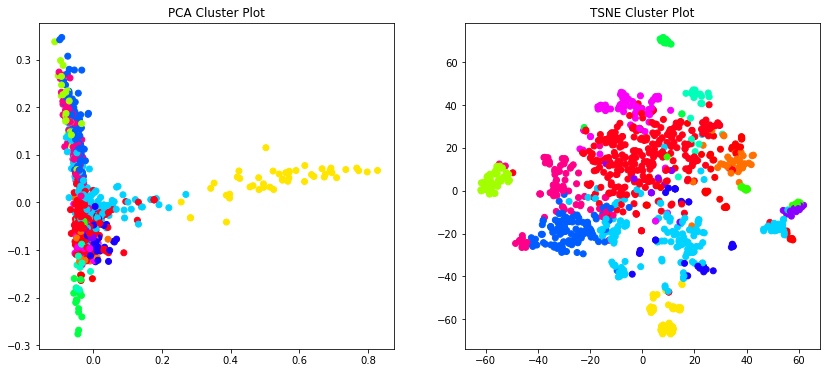

In [10]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=1000, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [11]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
서울,이날,분께,있다,손흥민은,오후,명이,것으로,태풍,오전

Cluster 1
징역,경찰은,쌍둥이,경찰에,검찰은,것으로,지난,a씨는,혐의를,혐의로

Cluster 2
인스타그램,no,최종편집,문화신문,기사입력,사진을,사진이,화제다,저작권자,뉴스컬처

Cluster 3
그리고,이벤트,같습니다,때문에,사전예약,게임을,다양한,게임,있는,있습니다

Cluster 4
산다,위디스크,박나래는,한국시리즈,회장이,플레이오프,차전,넥센,sk,양진호

Cluster 5
청소년보호책임자,편집인,복사,copyright,금합니다,저작권법의,all,rights,reserved,cbsi

Cluster 6
북미,문재인,도널드,아르헨티나,대통령과,비핵화,대통령이,미국,대통령은,트럼프

Cluster 7
함께,자신의,방송된,그는,있는,했다,영화,사진,라고,있다

Cluster 8
저는,그리고,이렇게,많이,있는,있어요,ㅎㅎ,정말,같아요,너무

Cluster 9
분노,운명과,sbs,하시모토,서울,열린,배우,기자,오후,텐아시아

Cluster 10
기자,국제뉴스,메이저리그,이데일리,현지시간,선발,경기에서,이닝,la,시즌

Cluster 11
대비,내년,포인트,반도체,억원,올해,것으로,있다,분기,중국

Cluster 12
그리고,가장,스마트폰,많은,때문에,다른,합니다,gb,있는,있습니다

Cluster 13
대한,위해,com,지난,것으로,있는,기자,통해,밝혔다,있다
